In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 11
## 11.1

Перепишем уравнение в каноничном виде, получаем что

$\rho(x) = 1$

$\lambda = -2E_{n,l} = \frac{1}{(n+1)^2}$

$p(x) = l(l+1)x^{-2} - 2x^{-1}$

In [360]:
def rho(x):
    return 1

def p(l, x):
    return l * (l + 1) / x ** 2 - 2 / x

def get_A(l, R, N):
    h = R / N
    a = np.zeros((N,N))
    i,j = np.indices(a.shape)
    for k in range(N):
        a[k][k] = -2 * h ** (-2) - p(l, (k + 1) * h)
    a[i == j - 1] = h ** (-2)
    a[i == j + 1] = h ** (-2)
    return a

In [361]:
def plot_eigen_functions(R, N):
    A = get_A(0, R, N)
    x = [i * R / N for i in range(N)]
    spectrum, vecs = np.linalg.eig(A)
    pairs = [[i, spectrum[i]] for i in range(N)]
    filtered = [x for x in pairs if x[1] > 0]
    ans = sorted(filtered, key=lambda x: abs(x[1]))[-5:]
    print([abs(1/(i + 1) ** 2 - ans[4 - i][1]) for i in range(5)])
    for i, val in ans:
        plt.plot(x, vecs[:,i], label="lambda = " + str(spectrum[i]))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Solutions')
    plt.legend()
    plt.show()

[2.6446505555055566e-05, 0.024243623622973443]


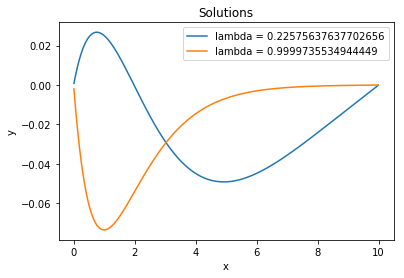

In [266]:
plot_eigen_functions(10, int(10 ** 3))

Как видим, при $R=10$ с хорошей точностью вычисляется только первое с. з., второе с большой погрешностью, остальные не вычисляются вообще.

[9.998000069799673e-05, 6.249688745796345e-06, 1.2345412615383244e-06, 3.9063011707946016e-07, 2.1667850726159177e-07]


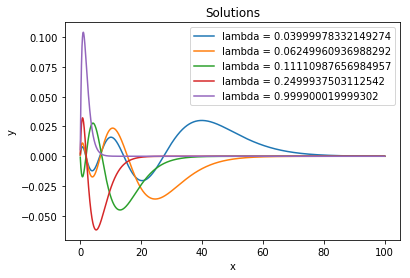

In [268]:
plot_eigen_functions(100, int(5 * 10 ** 3))

При $R = 100$ $N = 5000$ погрешность $= O(h^2) = \frac{R^2}{N^2} \approx 10^{-4}$, но на деле видим что для первых 5 значений погрешность $\leq 10^{-5}$

In [ ]:
def plot_difference():
    R = 100
    N = range(10, 400)
    

## 11.2

In [349]:
def get_A_numerov(l, R, N):
    h = R / N
    a = np.zeros((N, N))
    for i in range(N):
        a[i][i] = -2 * h ** (-2) - p(l, (i + 1) * h) + 1 / 6 * p(l, (i + 1) * h)
        
        if i != 0:
            a[i][i - 1] = h ** (-2) - p(l, i * h) / 12
            
        if i != N - 1:
            a[i][i + 1] = h ** (-2) - p(l, (i + 2) * h) / 12
    return a


def get_B_numerov(l, R, N):
    h = R / N
    b = np.zeros((N, N))
    for i in range(N):
        b[i][i] = 1 - 1 / 6
        
        if i != 0:
            b[i][i - 1] = 1 / 12
            
        if i != N - 1:
            b[i][i + 1] = 1 / 12
    return b

def get_numerov(l, R, N):
    return np.linalg.inv(get_B(l, R, N)) @ get_A(l, R, N)

In [350]:
def plot_eigen_functions_numerov():
    R = 50
    N = 10 ** 3
    A = get_numerov(0, R, N)
    x = [i * R / N for i in range(N)]
    spectrum, vecs = np.linalg.eig(A)
    pairs = [[i, spectrum[i]] for i in range(N)]
    filtered = [x for x in pairs if x[1] > 0]
    ans = sorted(filtered, key=lambda x: abs(x[1]))[-5:]
    ind = np.argsort(spectrum)[:5]
    for i, val in ans:
        plt.plot(x, vecs[:,i], label="lambda = " + str(spectrum[i]))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Solutions')
    plt.legend()
    plt.show()

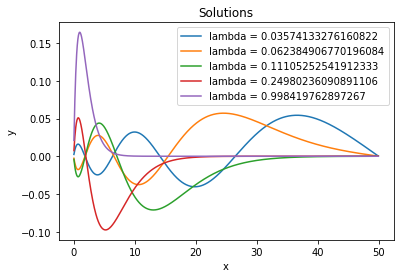

In [351]:
plot_eigen_functions_numerov()

Тоже, что и в сеточной аппрокисмации.

In [366]:
def get_max_error_mesh(R, N):
    A = get_A(0, R, N)
    x = [i * R / N for i in range(N)]
    spectrum, vecs = np.linalg.eig(A)
    pairs = [[i, spectrum[i]] for i in range(N)]
    filtered = [x for x in pairs if x[1] > 0]
    ans = sorted(filtered, key=lambda x: abs(x[1]))[-5:]
    return max([abs(1/(i + 1) ** 2 - ans[len(ans) - 1 - i][1]) for i in range(len(ans))])

def get_max_error_numerov(R, N):
    A = get_numerov(0, R, N)
    x = [i * R / N for i in range(N)]
    spectrum, vecs = np.linalg.eig(A)
    pairs = [[i, spectrum[i]] for i in range(N)]
    filtered = [x for x in pairs if x[1] > 0]
    ans = sorted(filtered, key=lambda x: abs(x[1]))[-5:]
    return max([abs(1/(i + 1) ** 2 - ans[len(ans) - 1 - i][1]) for i in range(len(ans))])

def plot_difference():
    R = 100
    N = range(10, 2 * 10 ** 2)
    error_numerov = [np.log10(get_max_error_numerov(R, n)) for n in N]
    error_mesh = [np.log10(get_max_error_mesh(R, n)) for n in N]
    plt.plot(N, error_numerov, label="numerov")
    plt.plot(N, error_mesh, label="mesh")
    plt.xlabel('N')
    plt.ylabel('log(Error)')
    plt.title('Difference')
    plt.legend()
    plt.show()

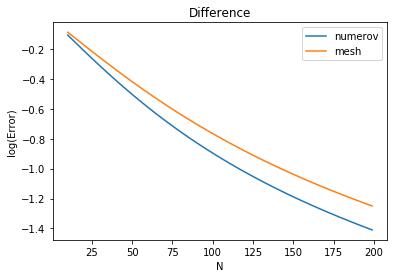

In [367]:
plot_difference()

Как видим, зависимость от ошибки $N$ одинаковая($\approx$ экспоненциальное убывание) и Нумеров работает лучше.